In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | berlevag
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | yanam
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | kendari
Processing Record 11 of Set 1 | belaya gora
Processing Record 12 of Set 1 | canon city
Processing Record 13 of Set 1 | malindi
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 17 of Set 1 | eureka
Processing Record 18 of Set 1 | ahipara
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...

City not found. Skipping...
Processing Record 34 of Set 4 | cherskiy
Processing Record 35 of Set 4 | bluff
Processing Record 36 of Set 4 | galesong
Processing Record 37 of Set 4 | ostersund
Processing Record 38 of Set 4 | burnie
Processing Record 39 of Set 4 | cayenne
Processing Record 40 of Set 4 | cananeia
Processing Record 41 of Set 4 | comodoro rivadavia
Processing Record 42 of Set 4 | aksarka
Processing Record 43 of Set 4 | rawson
Processing Record 44 of Set 4 | svetlaya
Processing Record 45 of Set 4 | yumen
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | chibuto
Processing Record 48 of Set 4 | wufeng
Processing Record 49 of Set 4 | ariguani
Processing Record 50 of Set 4 | finschhafen
Processing Record 1 of Set 5 | te anau
Processing Record 2 of Set 5 | deputatskiy
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | del rio
Processing Record 5 of Set 5 | san andres
Processing Record 6 of Set 5 | rioja
Processing Record 7 of Set 5 | moberly


Processing Record 22 of Set 8 | lata
Processing Record 23 of Set 8 | barawe
City not found. Skipping...
Processing Record 24 of Set 8 | coahuayana
Processing Record 25 of Set 8 | orlik
Processing Record 26 of Set 8 | shikarpur
Processing Record 27 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 28 of Set 8 | poum
Processing Record 29 of Set 8 | progreso
Processing Record 30 of Set 8 | sangmelima
Processing Record 31 of Set 8 | mazamari
Processing Record 32 of Set 8 | naryan-mar
Processing Record 33 of Set 8 | fort nelson
Processing Record 34 of Set 8 | aleksandrov gay
Processing Record 35 of Set 8 | yerbogachen
Processing Record 36 of Set 8 | odweyne
Processing Record 37 of Set 8 | santa maria
Processing Record 38 of Set 8 | presidente medici
Processing Record 39 of Set 8 | general bravo
Processing Record 40 of Set 8 | pingxiang
Processing Record 41 of Set 8 | constitucion
Processing Record 42 of Set 8 | aksum
Processing Record 43 of Set 8 | kargopol
Proc

Processing Record 9 of Set 12 | kirakira
Processing Record 10 of Set 12 | chute-aux-outardes
Processing Record 11 of Set 12 | demirci
Processing Record 12 of Set 12 | benghazi
Processing Record 13 of Set 12 | walcz
Processing Record 14 of Set 12 | faya
Processing Record 15 of Set 12 | bairiki
Processing Record 16 of Set 12 | orcopampa
Processing Record 17 of Set 12 | dukat
Processing Record 18 of Set 12 | yialos
City not found. Skipping...
Processing Record 19 of Set 12 | valdivia
Processing Record 20 of Set 12 | namatanai
Processing Record 21 of Set 12 | almaznyy
Processing Record 22 of Set 12 | bargal
City not found. Skipping...
Processing Record 23 of Set 12 | koumac
Processing Record 24 of Set 12 | sterlibashevo
Processing Record 25 of Set 12 | krasnoselkup
Processing Record 26 of Set 12 | prince george
Processing Record 27 of Set 12 | grand-lahou
Processing Record 28 of Set 12 | harper
Processing Record 29 of Set 12 | toliary
City not found. Skipping...
Processing Record 30 of Set

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,80.51,78,96,11.92,KI,2022-01-09 17:12:27
1,Hilo,19.7297,-155.0900,66.11,72,0,5.75,US,2022-01-09 17:07:48
2,Berlevag,70.8578,29.0864,26.60,60,100,15.64,NO,2022-01-09 17:12:28
3,Ilulissat,69.2167,-51.1000,8.62,72,75,4.61,GL,2022-01-09 17:12:29
4,Arraial Do Cabo,-22.9661,-42.0278,73.26,83,100,3.44,BR,2022-01-09 17:12:30
5,Yanam,16.7333,82.2167,75.60,86,1,1.72,IN,2022-01-09 17:12:30
6,Barrow,71.2906,-156.7887,-18.38,69,0,6.91,US,2022-01-09 17:12:31
7,Kendari,-3.9450,122.4989,76.46,89,100,0.47,ID,2022-01-09 17:12:31
8,Belaya Gora,68.5333,146.4167,-31.14,100,91,3.09,RU,2022-01-09 17:12:32
9,Canon City,38.4410,-105.2424,43.21,87,100,1.01,US,2022-01-09 17:12:32


In [11]:
#Reorder columms
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-01-09 17:12:27,3.0707,172.7902,80.51,78,96,11.92
1,Hilo,US,2022-01-09 17:07:48,19.7297,-155.0900,66.11,72,0,5.75
2,Berlevag,NO,2022-01-09 17:12:28,70.8578,29.0864,26.60,60,100,15.64
3,Ilulissat,GL,2022-01-09 17:12:29,69.2167,-51.1000,8.62,72,75,4.61
4,Arraial Do Cabo,BR,2022-01-09 17:12:30,-22.9661,-42.0278,73.26,83,100,3.44
5,Yanam,IN,2022-01-09 17:12:30,16.7333,82.2167,75.60,86,1,1.72
6,Barrow,US,2022-01-09 17:12:31,71.2906,-156.7887,-18.38,69,0,6.91
7,Kendari,ID,2022-01-09 17:12:31,-3.9450,122.4989,76.46,89,100,0.47
8,Belaya Gora,RU,2022-01-09 17:12:32,68.5333,146.4167,-31.14,100,91,3.09
9,Canon City,US,2022-01-09 17:12:32,38.4410,-105.2424,43.21,87,100,1.01


In [12]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

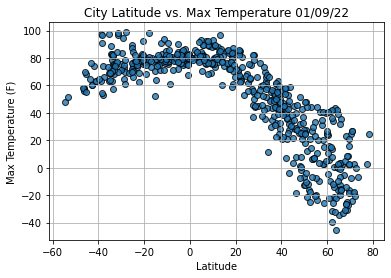

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

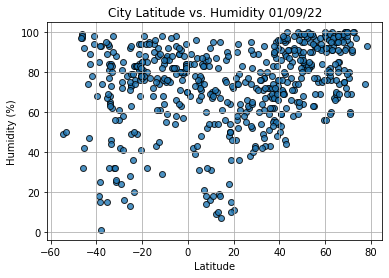

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

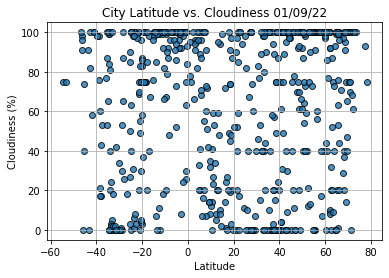

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

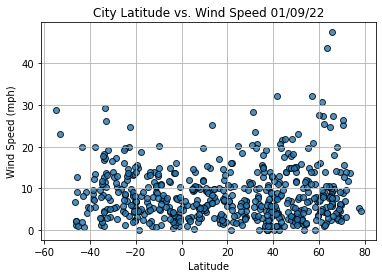

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

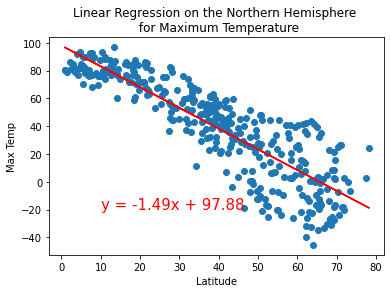

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

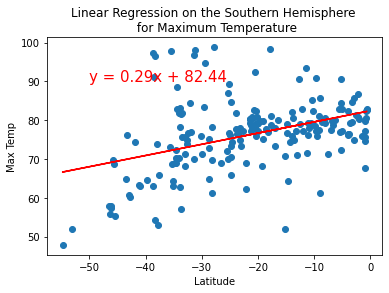

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

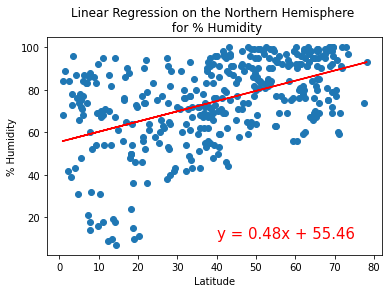

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

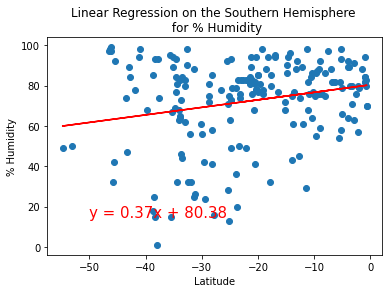

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

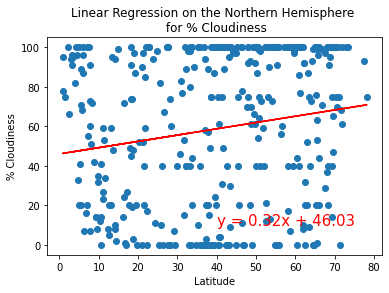

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

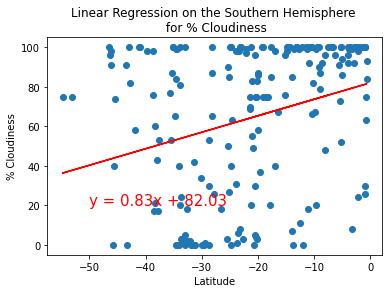

In [25]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,20))

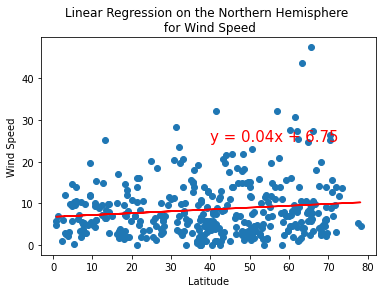

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

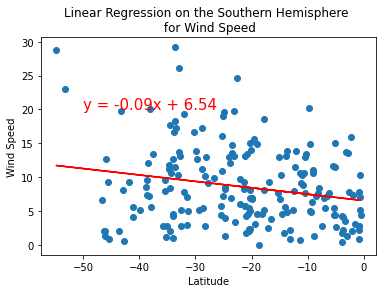

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))